In [1]:
import pickle as pkl
import pandas as pd

In [2]:
with open("results/bc/scores.pkl", "rb") as file:
    scores_list = pkl.load(file=file)

In [3]:
scores = {method: [scores[method][0] for scores in scores_list] for method in scores_list[0]}

<Axes: >

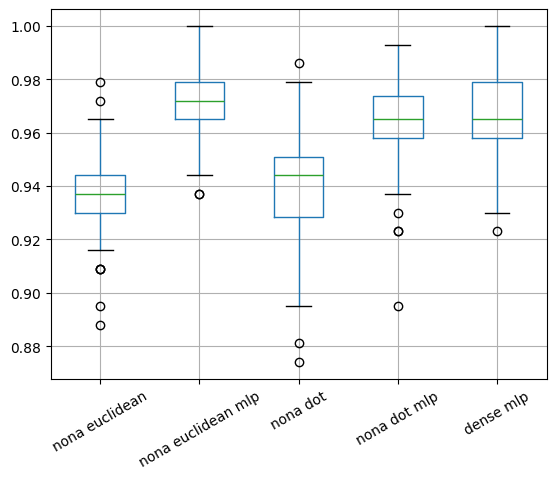

In [4]:
pd.DataFrame(scores).boxplot(rot=30)

In [5]:
pd.DataFrame(scores).median()

nona euclidean        0.937063
nona euclidean mlp    0.972028
nona dot              0.944056
nona dot mlp          0.965035
dense mlp             0.965035
dtype: float64

In [6]:
times = {method: [scores[method][1] for scores in scores_list] for method in scores_list[0]}

In [7]:
pd.DataFrame(times).boxplot(rot=30)

<Axes: >